<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 480.0+ MB
None
                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJf

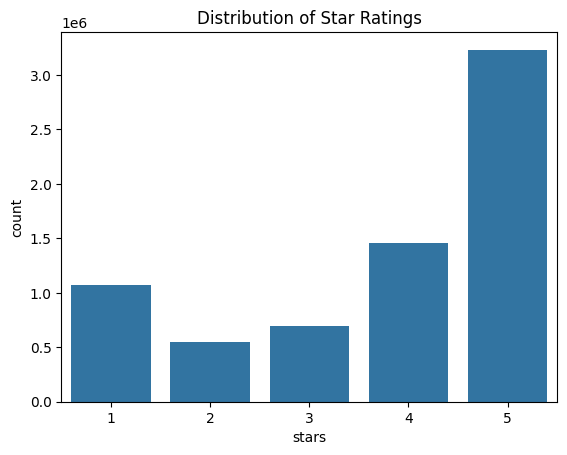

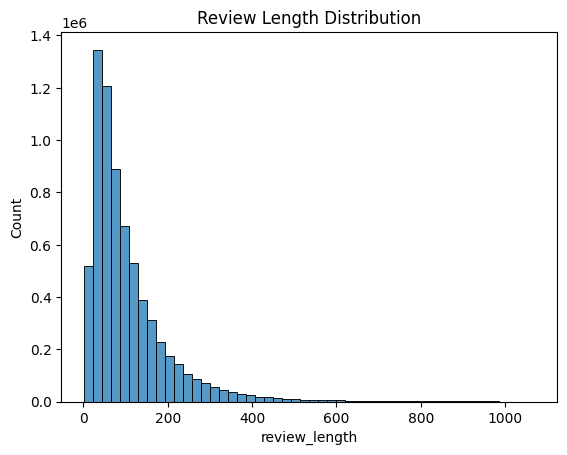

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

chunk_size = 100000  # Number of rows per chunk  
chunks = []  

for chunk in pd.read_json("yelp_academic_dataset_review.json", lines=True, chunksize=chunk_size):  
    chunks.append(chunk)  

df = pd.concat(chunks, ignore_index=True)  # Combine chunks into one DataFrame  

# Display basic information
print(df.info())
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Distribution of Star Ratings
sns.countplot(x=df['stars'])
plt.title('Distribution of Star Ratings')
plt.show()

# Word count distribution in reviews
df['review_length'] = df['text'].apply(lambda x: len(x.split()))
sns.histplot(df['review_length'], bins=50)
plt.title('Review Length Distribution')
plt.show()